In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from utils.data_loading import load_disruption_distance
from utils.data_loading import load_papers

In [3]:
import scipy

# Data loading

### Paper information

In [4]:
papers_df = load_papers('/gpfs/sciencegenome/AuthorDynamics/data/aps/preprocessed/paper_table.csv')
papers_df.head()

,paper_id,doi,year,date,journal_code,title,PACS1,PACS2,PACS3,PACS4,PACS5,category
0,0,10.1103/PhysRev.1.124,1913.0,1913-02-01,PR,An Absolute Determination of the Viscosity of Air,None,None,None,None,None,None
1,1,10.1103/PhysRev.1.16,1913.0,1913-01-01,PR,The Velocity of Electrons in the Photo-electri...,None,None,None,None,None,None
2,2,10.1103/PhysRev.1.218,1913.0,1913-03-01,PR,Brownian Movements in Gases at Low Pressures,None,None,None,None,None,None
3,3,10.1103/PhysRev.1.237,1913.0,1913-03-01,PR,Proceedings of the American Physical Society,None,None,None,None,None,None
4,4,10.1103/PhysRev.1.259,1913.0,1913-04-01,PR,The Annealing of Steel in an Alternating Magne...,None,None,None,None,None,None


In [4]:
#citation network
net = scipy.sparse.load_npz("/gpfs/sciencegenome/AuthorDynamics/data/aps/preprocessed/citation_net.npz")
citations = np.array(net.sum(axis=0))[0]
references = np.array(net.sum(axis=1)).reshape((1,-1))[0]
papers_df['citations'] = papers_df['paper_id'].apply(lambda x: citations[x])
papers_df['references'] = papers_df['paper_id'].apply(lambda x: references[x])

NameError: name 'papers_df' is not defined

In [ ]:
papers_df = papers_df[papers_df['citations']!=0]

In [ ]:
papers_df = papers_df[papers_df['references']!=0]

In [8]:
NETWORKS_NAME = ['original']
MEASURE = ['150_5_q_1_ep_5_bs_4096_embedding/distance']

for net in NETWORKS_NAME:
    for m in MEASURE:
        papers_df = load_disruption_distance(papers_df,net,m)

In [9]:
papers_df.head()

,paper_id,doi,year,date,journal_code,title,PACS1,PACS2,PACS3,PACS4,PACS5,category,citations,references,original_150_5_q_1_ep_5_bs_4096_embedding_distance,PCNT_RANK_original_150_5_q_1_ep_5_bs_4096_embedding_distance
21,21,10.1103/PhysRev.10.244,1917.0,1917-09-01,PR,The Ionization Potential of Electrodes in Vari...,None,None,None,None,None,None,4.0,1.0,1.002730,0.922005
22,22,10.1103/PhysRev.10.275,1917.0,1917-09-01,PR,The Effect of Strain on Heterogeneous Equilibrium,None,None,None,None,None,None,1.0,1.0,0.999714,0.917709
23,23,10.1103/PhysRev.10.284,1917.0,1917-09-01,PR,Demagnetization of Iron,None,None,None,None,None,None,1.0,1.0,1.025774,0.945865
34,34,10.1103/PhysRev.10.495,1917.0,1917-11-01,PR,The Ionizing Potentials of Gases,None,None,None,None,None,None,5.0,2.0,1.001055,0.919679
35,35,10.1103/PhysRev.10.515,1917.0,1917-11-01,PR,A Determination of the Planck Radiation Consta...,None,None,None,None,None,None,1.0,1.0,0.993395,0.907852


# citations and references data loading

In [5]:
#citation network
net = scipy.sparse.load_npz("/gpfs/sciencegenome/AuthorDynamics/data/aps/preprocessed/citation_net.npz")
citations = np.array(net.sum(axis=0))[0]
references = np.array(net.sum(axis=1)).reshape((1,-1))[0]
papers_df['citations'] = papers_df['paper_id'].apply(lambda x: citations[x])
papers_df['references'] = papers_df['paper_id'].apply(lambda x: references[x])

In [6]:
papers_df = papers_df[papers_df['citations']!=0]

In [7]:
papers_df = papers_df[papers_df['references']!=0]

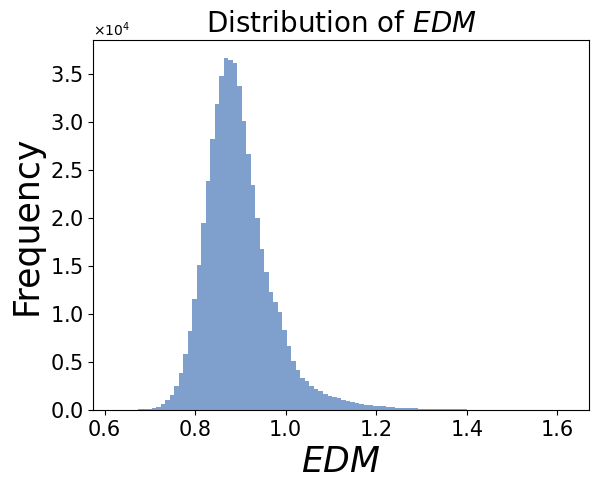

In [10]:

import matplotlib.ticker as mticker
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(papers_df['original_150_5_q_1_ep_5_bs_4096_embedding_distance'],bins=100,color = '#00429d',alpha=0.5)

ax.set_title('Distribution of $EDM$',fontsize=20)
ax.set_xlabel('$EDM$ ', fontsize = 25)
ax.set_ylabel('Frequency', fontsize = 25)
ax.tick_params(labelsize=15)
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((1,3))
ax.yaxis.set_major_formatter(formatter)
# plt.savefig('../data/Figures/Distribution_distance_original_n2v_w1.png',bbox_inches='tight')
fig.show()